```mermaid
flowchart LR
subgraph background[background]
    B_2020
    B_2030
end

subgraph foreground[foreground]
    A
end

subgraph biosphere[biosphere]
    CO2
end

    B_2020(Process B \n 2020):::ei-->|"amounts: [30%,70%] * 3 kg\n dates:[-2,-1]" years|A(Process A):::fg
    A-->|"amounts: [60%, 40%] * 5 kg\n dates: [0,+1]" years|CO2(CO2 Emission)
    B_2020-->|"amounts: [100%] * 11 kg\n dates:[0]" years|CO2
    B_2030(Process B \n 2030):::ei-->|"amounts: [100%] * 7 kg\n dates:[0]" years|CO2

    classDef ei color:#222832, fill:#3fb1c5, stroke:none;
    classDef fg color:#222832, fill:#9c5ffd, stroke:none;
```

In [1]:
import bw2data as bd
import numpy as np
from bw_temporalis import TemporalDistribution

bd.projects.set_current("timex_minimal_example")

bd.Database("biosphere").write(
    {
        ("biosphere", "CO2"): {
            "type": "emission",
            "name": "CO2",
        },
    }
)

bd.Database("background_t0").write(
    {
        ("background_t0", "B"): {
            "name": "B",
            "location": "somewhere",
            "reference product": "B",
            "exchanges": [
                {
                    "amount": 1,
                    "type": "production",
                    "input": ("background_t0", "B"),
                },
                {
                    "amount": 11,
                    "type": "biosphere",
                    "input": ("biosphere", "CO2"),
                },
            ],
        },
    }
)

bd.Database("background_t1").write(
    {
        ("background_t1", "B"): {
            "name": "B",
            "location": "somewhere",
            "reference product": "B",
            "exchanges": [
                {
                    "amount": 1,
                    "type": "production",
                    "input": ("background_t1", "B"),
                },
                {
                    "amount": 7,
                    "type": "biosphere",
                    "input": ("biosphere", "CO2"),
                },
            ],
        },
    }
)

bd.Database("foreground").write(
    {
        ("foreground", "A"): {
            "name": "A",
            "location": "somewhere",
            "reference product": "A",
            "exchanges": [
                {
                    "amount": 1,
                    "type": "production",
                    "input": ("foreground", "A"),
                },
                {
                    "amount": 3,
                    "type": "technosphere",
                    "input": ("background_t0", "B"),
                    "temporal_distribution": TemporalDistribution(
                        date=np.array([-2, -1], dtype="timedelta64[Y]"),
                        amount=np.array([0.3, 0.7]),
                    ),
                },
                {
                    "amount": 5,
                    "type": "biosphere",
                    "input": ("biosphere", "CO2"),
                    "temporal_distribution": TemporalDistribution(
                        date=np.array([0, 1], dtype="timedelta64[Y]"),
                        amount=np.array([0.6, 0.4]),
                    ),
                }
            ],
        },
    }
)

bd.Method(("our", "method")).write(
    [
        (("biosphere", "CO2"), 1),
    ]
)

100%|██████████| 1/1 [00:00<00:00, 1739.65it/s]


Vacuuming database 
Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<00:00, 16844.59it/s]


Vacuuming database 
Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<00:00, 20763.88it/s]


Vacuuming database 
Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<00:00, 16578.28it/s]

Vacuuming database 


In [2]:
from datetime import datetime
database_date_dict = {
    "background_t0": datetime.strptime("2020", "%Y"),
    "background_t1": datetime.strptime("2030", "%Y"),
    "foreground": "dynamic",
}

In [3]:
from bw_timex import TimexLCA

In [4]:
tlca = TimexLCA(
    demand={("foreground", "A"): 1},
    method=("our", "method"),
    database_date_dict=database_date_dict,
)

In [5]:
tlca.build_timeline()

Starting graph traversal
Calculation count: 1


/Users/timodiepers/Documents/Coding/bw_timex/bw_timex/timex_lca.py:194: UserWarning: No edge filter function provided. Skipping all edges within background databases.
  warnings.warn(


,date_producer,producer_name,date_consumer,consumer_name,amount,interpolation_weights
0,2022-01-01,C,2024-01-01,A,0.9,"{'background_t0': 0.7998905009581166, 'backgro..."
1,2023-01-01,C,2024-01-01,A,2.1,"{'background_t0': 0.6999726252395291, 'backgro..."
2,2024-01-01,A,2024-01-01,-1,1.0,None


In [6]:
tlca.lci()

/Users/timodiepers/anaconda3/envs/timex/lib/python3.10/site-packages/bw2calc/lca_base.py:127: SparseEfficiencyWarning: splu converted its input to CSC format
  self.solver = factorized(self.technosphere_matrix)


In [7]:
tlca.create_labelled_technosphere_dataframe()

,"((background_t0, C), 2020)","((background_t1, C), 2030)","((foreground, A), dynamic)","((temporalized, C), 2022)","((temporalized, C), 2023)","((temporalized, A), 2024)"
"((background_t0, C), 2020)",1.0,0.0,-3.0,-0.799891,-0.699973,0.0
"((background_t1, C), 2030)",0.0,1.0,0.0,-0.200109,-0.300027,0.0
"((foreground, A), dynamic)",0.0,0.0,1.0,0.000000,0.000000,0.0
"((temporalized, C), 2022)",0.0,0.0,0.0,1.000000,0.000000,-0.9
"((temporalized, C), 2023)",0.0,0.0,0.0,0.000000,1.000000,-2.1
"((temporalized, A), 2024)",0.0,0.0,0.0,0.000000,0.000000,1.0


In [8]:
tlca.create_labelled_biosphere_dataframe()

,"((background_t0, C), 2020)","((background_t1, C), 2030)","((foreground, A), dynamic)","((temporalized, C), 2022)","((temporalized, C), 2023)","((temporalized, A), 2024)"
"(biosphere, CO2)",11.0,7.0,5.0,0.0,0.0,5.0


In [9]:
tlca.create_labelled_dynamic_biosphere_dataframe()

,"((background_t0, C), 2020)","((background_t1, C), 2030)","((foreground, A), dynamic)","((temporalized, C), 2022)","((temporalized, C), 2023)","((temporalized, A), 2024)"
"(89, 2022-01-01T00:00:00)",0.0,0.0,0.0,10.199562,0.000000,0.0
"(89, 2023-01-01T00:00:00)",0.0,0.0,0.0,0.000000,9.799891,0.0
"(89, 2024-01-01T00:00:00)",0.0,0.0,0.0,0.000000,0.000000,3.0
"(89, 2024-12-31T05:49:12)",0.0,0.0,0.0,0.000000,0.000000,2.0


In [10]:
tlca.create_labelled_dynamic_inventory_dataframe()

,date,amount,flow,activity
0,2022-01-01 00:00:00,9.179606,CO2,C
1,2023-01-01 00:00:00,20.579770,CO2,C
2,2024-01-01 00:00:00,3.000000,CO2,A
3,2024-12-31 05:49:12,2.000000,CO2,A


In [12]:
from dynamic_characterization.timex import characterize_co2
emission_id = bd.get_activity(("biosphere", "CO2")).id

characterization_function_dict = {
    emission_id: characterize_co2,
}

In [13]:
tlca.dynamic_lcia(
    metric="radiative_forcing",
    time_horizon=30,
    characterization_function_dict=characterization_function_dict,
)

,date,amount,flow,activity
0,2023-01-01 05:49:12,1.512067e-14,89,93
1,2024-01-01 05:49:12,3.389905e-14,89,94
2,2024-01-01 11:38:24,1.419411e-14,89,93
3,2024-12-31 05:49:12,4.941608e-15,89,95
4,2024-12-31 11:38:24,3.182179e-14,89,94
...,...,...,...,...
111,2051-12-31 18:57:36,1.923429e-15,89,95
112,2052-01-01 00:46:48,1.949148e-14,89,94
113,2052-12-31 00:46:48,1.908618e-15,89,95
114,2052-12-31 00:46:48,2.841355e-15,89,95


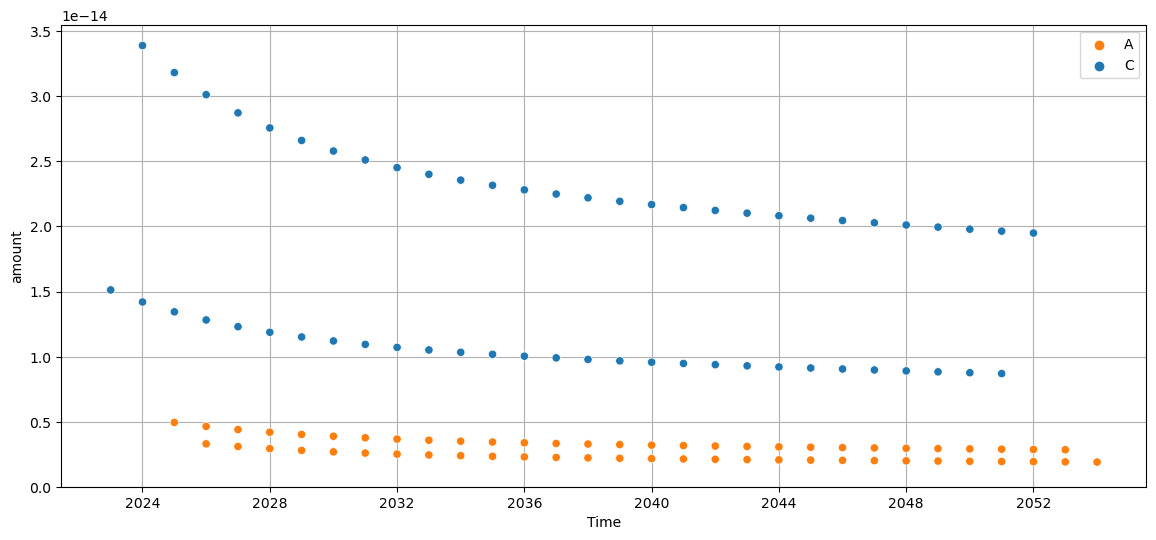

In [14]:
tlca.plot_dynamic_characterized_inventory()